#About the Data

* The data was taken from 
https://m.rbi.org.in//scripts/PublicationReportDetails.aspx?ID=242

* Each rule is considered as a record under the the headings:<br>

  1. Enhancing Bank Transparency
  2. Best Practices for Credit Risk Disclosure
  3. Supervision of Financial Conglomerates 
  4. Risk Concentrations Principles
  5. Intra-Group Transactions and Exposures Principles
  6. Principles for the Supervision of Banks’ Foreign Establishments (The Basel Concordat)
  7. Information Flows Between Banking Supervisory Authorities
  8. Minimum Standards for the Supervision of 
International Banking Groups and their Cross-Border Establishments
  9. The Supervision of Cross-Border Banking 
  
* Rules are seperated by their rule number.


# Text Preprocessing

* The line break ‘\n’ is removed from the text, if there exist any.

* Round and square parantheses are removed, if there exist any.

* Text contatined within round paranthesis are removed, if there exist any.

* Text contatined within square paranthesis are removed, if there exist any.

* No summarization was done.

#Fine Tuning DistilBERT model for text classification

* The model was trained on 5 epochs and the learning rate was set at 2e-5 and batch size 16

* Total training time taken across all epochs [Validation and model saving time included]:  0:01:26 (h:mm:ss)

* Data Split:<br>
      -Training data: 158 (50 percent)
      -Validation data: 79 (25 percent)
      -Test Data : 79 (25 percent)

* Macro-averaged f1-score<br>
      -Training data: 0.26
      -Validation data: 0.07



## Next Steps

* Calculate Metrics on the test Data Set. 





##Google Drive access

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Write the appropriate paths to retrieve the data and store results 
dataset_clean_path = '/content/drive/MyDrive/Full_Code/RBI/Parentheses_Removed/dataset_clean'
saved_path = '/content/drive/MyDrive/Full_Code/RBI/Parentheses_Removed/Epochs_5/'
used_test_data_path = saved_path + 'Test_data_DistilBERT.csv'
encoded_test_data_path = saved_path + 'ENCODED_Test_data_DistilBERT.csv'
label2id_df_path = saved_path + 'label2id_df.csv'

## Set-up environment

Install the libraries folium version 0.2.1, HuggingFace Transformers and Datasets

In [ ]:
#Install the package folium version 0.2.1 and HuggingFace tranformer and datasets libraries  
!pip install -q folium==0.2.1 transformers datasets 

     |████████████████████████████████| 69 kB 5.5 MB/s 
     |████████████████████████████████| 4.2 MB 37.6 MB/s 
     |████████████████████████████████| 346 kB 39.5 MB/s 
     |████████████████████████████████| 596 kB 65.9 MB/s 
     |████████████████████████████████| 6.6 MB 57.3 MB/s 
     |████████████████████████████████| 86 kB 3.8 MB/s 
     |████████████████████████████████| 140 kB 72.8 MB/s 
     |████████████████████████████████| 1.1 MB 61.1 MB/s 
     |████████████████████████████████| 212 kB 74.2 MB/s 
     |████████████████████████████████| 86 kB 6.1 MB/s 
     |████████████████████████████████| 127 kB 75.5 MB/s 
     |████████████████████████████████| 144 kB 74.7 MB/s 
     |████████████████████████████████| 271 kB 72.7 MB/s 
     |████████████████████████████████| 94 kB 4.2 MB/s 


In [ ]:
import torch
#Check if GPU is available
device = "cuda:0" if torch.cuda.is_available() else "cpu"
print(device, "is available")

cuda:0 is available


##Memory Allocated

In [ ]:
!nvidia-smi -q


==============NVSMI LOG==============

Timestamp                                 : Thu May 26 18:07:09 2022
Driver Version                            : 460.32.03
CUDA Version                              : 11.2

Attached GPUs                             : 1
GPU 00000000:00:04.0
    Product Name                          : Tesla P100-PCIE-16GB
    Product Brand                         : Tesla
    Display Mode                          : Enabled
    Display Active                        : Disabled
    Persistence Mode                      : Disabled
    MIG Mode
        Current                           : N/A
        Pending                           : N/A
    Accounting Mode                       : Disabled
    Accounting Mode Buffer Size           : 4000
    Driver Model
        Current                           : N/A
        Pending                           : N/A
    Serial Number                         : 0320118081249
    GPU UUID                              : GPU-fc82046e-a4dd-159

In [ ]:
!nvidia-smi

Thu May 26 18:07:09 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    28W / 250W |      2MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!lscpu |grep 'Model name'

Model name:          Intel(R) Xeon(R) CPU @ 2.00GHz


In [ ]:
!free -h --si | awk  '/Mem:/{print $2}'

13G


# Loading the dataset

In [ ]:
#Load the data dataset_clean
from datasets import load_from_disk
dataset_clean = load_from_disk(dataset_clean_path)
dataset_clean

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 158
    })
    validation: Dataset({
        features: ['sentence', 'label'],
        num_rows: 79
    })
    test: Dataset({
        features: ['sentence', 'label'],
        num_rows: 79
    })
})

Let's create a list that contains the labels, as well as 2 dictionaries that map labels to integers and back.

In [ ]:
labels = list(sorted(set(dataset_clean['train']['label'])))
id2label = {idx:label for idx, label in enumerate(labels)}
label2id = {label:idx for idx, label in enumerate(labels)}
labels

['Best Practices for Credit Risk Disclosure',
 'Enhancing Bank Transparency',
 'Information Flows Between Banking Supervisory Authorities',
 'Intra-Group Transactions and Exposures Principles',
 'Minimum Standards for the Supervision of International Banking Groups and their Cross-Border Establishments',
 'Principles for the Supervision of Banks’ Foreign Establishments (The Basel Concordat)',
 'Risk Concentrations Principles',
 'Supervision of Financial Conglomerates',
 'The Supervision of Cross-Border Banking']

The dataset consists of 9 labels.

## Preprocess data


Since the model don't expect text as direct input, but rather `input_ids`, etc., we tokenize the text using the tokenizer. Here I'm using the `AutoTokenizer` API, which will automatically load the appropriate tokenizer based on the checkpoint on the hub.

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('distilbert-base-cased',num_labels=len(labels))

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/411 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

In [ ]:
import numpy as np
def preprocess_data(examples):
  # take a batch of texts
  text = examples["sentence"]
  # encode them
  encoding = tokenizer(text, padding="max_length", truncation=True)
  # add labels
  encoding["labels"] = [label2id[i] for i in examples["label"]]
  return encoding

In [ ]:
encoded_dataset = dataset_clean.map(preprocess_data, batched=True, remove_columns = ['sentence', 'label'])

Loading cached processed dataset at /content/drive/MyDrive/Full_Code/RBI/Parentheses_Removed/dataset_clean/train/cache-c9e537ad72a0b93a.arrow
Loading cached processed dataset at /content/drive/MyDrive/Full_Code/RBI/Parentheses_Removed/dataset_clean/validation/cache-4476767b72210d85.arrow
Loading cached processed dataset at /content/drive/MyDrive/Full_Code/RBI/Parentheses_Removed/dataset_clean/test/cache-66c875227c923c45.arrow


In [ ]:
example = encoded_dataset['train'][0]
print(example.keys())

dict_keys(['input_ids', 'attention_mask', 'labels'])


In [ ]:
tokenizer.decode(example['input_ids'])

'[CLS] A bank should disclose a reconciliation of changes in the allowances for credit impairment. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [

In [ ]:
example['labels']

0

In [ ]:
encoded_dataset

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 158
    })
    validation: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 79
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 79
    })
})

Set the format of encoded_dataset to PyTorch tensors. This will turn the training, validation and test sets into standard PyTorch [datasets]

In [ ]:
encoded_dataset.set_format("torch")

## Define model

Define a model that includes a pre-trained base (i.e. the weights from the distilbert-base-cased) which is loaded, with a random initialized classification head (linear layer) on top. Fine-tune this head, together with the pre-trained base on a labeled dataset. Set the id2label and label2id mappings to make sure the output layer has `len(labels)` output neurons.

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-cased",
                                                           num_labels=len(labels),
                                                           id2label=id2label,
                                                           label2id=label2id)

Downloading:   0%|          | 0.00/251M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_projector.weight', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.weight', 'pre_classifier.weight', 'classifier.b

## Train the model!

We are going to train the model using native Pytorch. This requires us to define 2 things: 

* `DataLoader`:Create a DataLoader for your training, validation and test datasets so you can iterate over batches of data.
* `Optimizer`
* `Learning rate scheduler`



In [ ]:
fix_seed = 42
fixed_batch_size = 16
fixed_learning_rate = 2e-5
num_epochs = 5

In [ ]:
#DataLoader
from torch.utils.data import DataLoader

train_dataloader = DataLoader(encoded_dataset["train"], batch_size = fixed_batch_size)
eval_dataloader = DataLoader(encoded_dataset["validation"], batch_size = fixed_batch_size)

In [ ]:
#Optimizer
from torch.optim import AdamW
optimizer = AdamW(model.parameters(),lr = fixed_learning_rate)


In [ ]:
#Learning rate scheduler 

from transformers import get_scheduler

num_training_steps = num_epochs * len(train_dataloader)

lr_scheduler = get_scheduler(name="linear", optimizer = optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

Compute accuracy, precision, recall, F-measure while training. For this, define the multi_class_metric function.

In [ ]:
# Function to calculate the accuracy, precision, recall, F-measure of our predictions vs labels
from sklearn.metrics import precision_recall_fscore_support

def multi_class_metric(labels,preds):
    pred_flat = preds.flatten()
    labels_flat = labels.flatten()
    accuracy = np.sum(pred_flat == labels_flat) / len(labels_flat)
    precision_macro, recall_macro, f1_macro_average,_ = precision_recall_fscore_support(labels,preds,average='macro',zero_division = 0)
    # return as dictionary
    metrics = {
               'f1': f1_macro_average,
               'accuracy': accuracy,
               'precision': precision_macro,
               'recall': recall_macro
               }
    return metrics

In [ ]:
model.to(device)

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
       

Create a function for formatting elapsed times as hh:mm:ss

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


Create two directories to store **checkpoint** and **best_model**

In [ ]:
%mkdir /content/drive/MyDrive/Full_Code/RBI/Parentheses_Removed/Epochs_5/checkpoint
%mkdir /content/drive/MyDrive/Full_Code/RBI/Parentheses_Removed/Epochs_5/best_model

Saving function
**save_ckp** is created to save checkpoint, the latest one and the best one. This creates flexibility: either you are interested in the state of the latest checkpoint or the best checkpoint.

In [ ]:
import shutil
def save_ckp(state, is_best, checkpoint_path, best_model_path):
    """
    state: checkpoint we want to save
    is_best: is this the best checkpoint; min validation loss
    checkpoint_path: path to save checkpoint
    best_model_path: path to save best model
    """
    f_path = checkpoint_path
    # save checkpoint data to the path given, checkpoint_path
    torch.save(state, f_path)
    # if it is a best model, min validation loss
    if is_best:
        best_fpath = best_model_path
        # copy that checkpoint file to best path given, best_model_path
        shutil.copyfile(f_path, best_fpath)

Loading Function.

**load_chkp** is created for loading model. 

It takes:
*   location of the saved checkpoint
*   model instance that you want to load the state to
*   the optimizer

In [ ]:
def load_ckp(checkpoint_fpath, model, optimizer):
    """
    checkpoint_path: path to save checkpoint
    model: model that we want to load checkpoint parameters into       
    optimizer: optimizer we defined in previous training
    """
    # load check point
    checkpoint = torch.load(checkpoint_fpath)
    # initialize state_dict from checkpoint to model
    model.load_state_dict(checkpoint['state_dict'])
    # initialize optimizer from checkpoint to optimizer
    optimizer.load_state_dict(checkpoint['optimizer'])
    # initialize valid_loss_min from checkpoint to valid_loss_min
    valid_loss_min = checkpoint['valid_loss_min']
    # return model, optimizer, epoch value, min validation loss 
    return model, optimizer, checkpoint['epoch'], valid_loss_min


Start Training 

In [ ]:
import random
from tqdm.auto import tqdm


# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


random.seed(fix_seed)
np.random.seed(fix_seed)
torch.manual_seed(fix_seed)
torch.cuda.manual_seed_all(fix_seed)



# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

progress_bar = tqdm(range(num_epochs))


valid_loss_min_input = np.Inf
# Initialize tracker for minimum validation loss
valid_loss_min = valid_loss_min_input 
# Create paths for storing the current checkpoint and best model checkpoint
checkpoint_path = saved_path + "checkpoint/current_checkpoint.pt"
best_model_path = saved_path + "/best_model/best_model.pt"

# Reset time taken for Training Data and Validation Data across all epochs
training_time_only = 0
validation_time_only = 0

# For each epoch...
for epoch_i in range(0, num_epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, num_epochs))
    print('Training...')

    

    # Reset the total loss and other metrics for this epoch.
    total_train_loss = 0
    total_train_f1 = 0
    total_train_accuracy = 0
    total_train_precision = 0
    total_train_recall = 0

    # Reset the time taken on Training data and Validation data across this epoch
    training_time_epoch = 0
    validation_time_epoch = 0

    # Measure how long the training epoch takes.
    train_t0 = time.time()

    # Put the model into training mode.
    
    model.train()
    for batch in train_dataloader:
      train_batch = {k: v.to(device) for k, v in batch.items()}
      train_outputs = model(**train_batch)
      train_loss = train_outputs.loss
      train_logits = train_outputs.logits
      train_predictions = torch.argmax(train_logits, dim=-1)
      total_train_loss += train_loss.item()
      train_metrics= multi_class_metric(train_predictions.detach().cpu().numpy(), train_batch["labels"].to('cpu').numpy())
      train_f1 = train_metrics['f1']
      train_accuracy = train_metrics['accuracy']
      train_precision =train_metrics['precision']
      train_recall = train_metrics['recall']
      
      total_train_f1 += train_f1
      total_train_accuracy += train_accuracy
      total_train_precision += train_precision
      total_train_recall += train_recall
      train_loss.backward()

      # Clip the norm of the gradients to 1.0.
      #This is to help prevent the "exploding gradients" problem.
      torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0) 

      # Update parameters and take a step using the computed gradient.
      # The optimizer dictates the "update rule"--how the parameters are
      # modified based on their gradients, the learning rate, etc.
      optimizer.step()
      lr_scheduler.step()
      optimizer.zero_grad() 
    
    # Measure how long the Training run took.
    training_time_epoch = time.time() - train_t0   
      
    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)  

    # Report the final f1-score for this training run.   
    avg_train_f1 = total_train_f1 / len(train_dataloader)

    # Report the final accuracy for this training run.   
    avg_train_accuracy = total_train_accuracy / len(train_dataloader)

    # Report the final precision for this training run.   
    avg_train_precision = total_train_precision / len(train_dataloader)

    # Report the final recall for this training run.   
    avg_train_recall = total_train_recall / len(train_dataloader)

              
    #Accumulate the total time on trainind data across all epochs  
    training_time_only +=  training_time_epoch   

    print(" Training f1-score: {0:.2f}".format(avg_train_f1)) 
    print(" Training Accuracy: {0:.2f}".format(avg_train_accuracy)) 
    print(" Training Precision: {0:.2f}".format(avg_train_precision)) 
    print(" Training Recall: {0:.2f}".format(avg_train_recall))  
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(format_time(training_time_epoch)))
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    val_t0 = time.time()
    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_f1 = 0
    total_eval_accuracy = 0
    total_eval_precision = 0
    total_eval_recall = 0
    total_eval_loss = 0


    # Evaluate data for one epoch
    for batch in eval_dataloader:
      val_batch = {k: v.to(device) for k, v in batch.items()}
     
      # Tell pytorch not to bother with constructing the compute graph during
      # the forward pass, since this is only needed for backprop (training).
      with torch.no_grad():
        val_outputs = model(**val_batch)
        
      val_loss = val_outputs.loss
      val_logits = val_outputs.logits
      val_predictions = torch.argmax(val_logits, dim=-1)
     
      total_eval_loss += val_loss.item()

      val_metrics = multi_class_metric(val_predictions.detach().cpu().numpy(), val_batch["labels"].to('cpu').numpy())
      val_f1 = val_metrics['f1']
      val_accuracy = val_metrics['accuracy']
      val_precision =val_metrics['precision']
      val_recall = val_metrics['recall']

      total_eval_f1 += val_f1
      total_eval_accuracy += val_accuracy
      total_eval_precision += val_precision
      total_eval_recall += val_recall

      # Accumulate the validation loss.
      total_eval_loss += val_loss.item()
        
    # Measure how long the validation run took.
    validation_time_epoch = time.time() - val_t0

    # Report the final metrics for this validation run.   
    avg_val_f1 = total_eval_f1 / len(eval_dataloader)
    avg_val_accuracy = total_eval_accuracy / len(eval_dataloader)
    avg_val_precision = total_eval_precision / len(eval_dataloader)
    avg_val_recall = total_eval_recall / len(eval_dataloader)


    print(" Validation f1-score: {0:.2f}".format(avg_val_f1)) 
    print(" Validation Accuracy: {0:.2f}".format(avg_val_accuracy))
    print(" Validation Precision: {0:.2f}".format(avg_val_precision)) 
    print(" Validation Recall: {0:.2f}".format(avg_val_recall)) 
    

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(eval_dataloader)
    
    
    #Accumulate the the total validation time across all epochs 
    validation_time_only += validation_time_epoch
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(format_time(validation_time_epoch)))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Training f1': avg_train_f1,
            'Valid. f1': avg_val_f1,
            'Training Accur.': avg_train_accuracy,
            'Valid. Accur.': avg_val_accuracy,
            'Training Precision': avg_train_precision,
            'Valid. Precision': avg_val_precision,
            'Training Recall': avg_train_recall,
            'Valid. Recall': avg_val_recall,
            'Training Time': format_time(training_time_epoch),
            'Validation Time': format_time(validation_time_epoch)
        }
    )
    # Create checkpoint variable and add important data
    checkpoint = {
        'epoch': epoch_i + 1,
        'valid_loss_min': avg_val_loss,
        'state_dict': model.state_dict(),
        'optimizer': optimizer.state_dict(),
    }
        
    # Save checkpoint
    save_ckp(checkpoint, False, checkpoint_path, best_model_path)
    ## Save the model if validation loss has decreased
    if avg_val_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,avg_val_loss))
        # Save checkpoint as best model
        save_ckp(checkpoint, True, checkpoint_path, best_model_path)
        valid_loss_min = avg_val_loss
    progress_bar.update(1)
print("")
print("Training complete!")
total_training_time = time.time() - total_t0

# Total Training time (without validation and model saving time)
print("\nTotal time taken on the training data across all epochs: {:} (h:mm:ss)".format(format_time(training_time_only)))
print("Average time take per epoch on training data: {:} (h:mm:ss)".format(format_time(training_time_only/num_epochs)))

# Total Validation time (without training and model saving time)
print("\nTotal time taken on the validation data across all epochs: {:} (h:mm:ss)".format(format_time(validation_time_only)))
print("Average time take per epoch on validation data: {:} (h:mm:ss)".format(format_time(validation_time_only/num_epochs)))

#Total time taken for training, Validation and model saving
print("\nTotal training time taken across all epochs [Validation and model saving time included]: {:} (h:mm:ss)".format(format_time(total_training_time)))
print("Average time take per epoch [Validation and model saving time included]: {:} (h:mm:ss)".format(format_time(total_training_time/num_epochs)))




  0%|          | 0/5 [00:00<?, ?it/s]


======== Epoch 1 / 5 ========
Training...
 Training f1-score: 0.03
 Training Accuracy: 0.05
 Training Precision: 0.03
 Training Recall: 0.05
  Average training loss: 2.23
  Training epoch took: 0:00:04

Running Validation...
 Validation f1-score: 0.08
 Validation Accuracy: 0.27
 Validation Precision: 0.13
 Validation Recall: 0.06
  Validation Loss: 4.27
  Validation took: 0:00:01
Validation loss decreased (inf --> 4.271830).  Saving model ...

======== Epoch 2 / 5 ========
Training...
 Training f1-score: 0.11
 Training Accuracy: 0.25
 Training Precision: 0.12
 Training Recall: 0.13
  Average training loss: 2.13
  Training epoch took: 0:00:04

Running Validation...
 Validation f1-score: 0.07
 Validation Accuracy: 0.29
 Validation Precision: 0.14
 Validation Recall: 0.04
  Validation Loss: 4.18
  Validation took: 0:00:01
Validation loss decreased (4.271830 --> 4.178160).  Saving model ...

======== Epoch 3 / 5 ========
Training...
 Training f1-score: 0.26
 Training Accuracy: 0.28
 Train

**The best model is saved at epoch 5. The macro-averaged f1-score for training: 0.26 .The macro-averaged f1-score for validation: 0.07**

In [ ]:
import pandas as pd 
# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# Display the table.
df_stats.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

,Training Loss,Valid. Loss,Training f1,Valid. f1,Training Accur.,Valid. Accur.,Training Precision,Valid. Precision,Training Recall,Valid. Recall,Training Time,Validation Time
epoch,,,,,,,,,,,,
1,2.23,4.27,0.03,0.08,0.05,0.27,0.03,0.13,0.05,0.06,0:00:04,0:00:01
2,2.13,4.18,0.11,0.07,0.25,0.29,0.12,0.14,0.13,0.04,0:00:04,0:00:01
3,2.06,4.09,0.26,0.07,0.28,0.29,0.30,0.14,0.24,0.04,0:00:04,0:00:01
4,1.97,4.03,0.26,0.07,0.28,0.29,0.30,0.14,0.24,0.04,0:00:04,0:00:01
5,1.92,4.00,0.26,0.07,0.29,0.29,0.30,0.14,0.29,0.04,0:00:04,0:00:01


Validation Loss is a more precise measure than accuracy. If we are predicting the correct answer, but with less confidence, then validation loss will catch this, while accuracy will not.

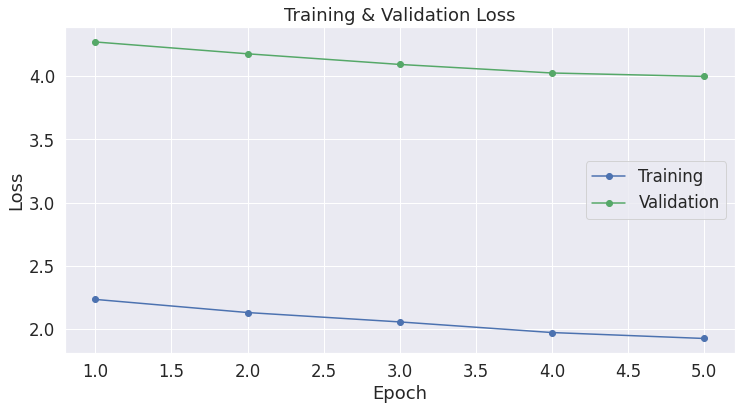

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Download the Data

In [ ]:
#Save the Test Data in drive
used_test_df =pd.DataFrame(dataset_clean['test'])
used_test_df.to_csv(used_test_data_path, encoding='utf-8', index=False)
print("\nSaved Test Data")


Saved Test Data


In [ ]:
#Save the Encoded Test Data in Drive 
encoded_test = pd.DataFrame(encoded_dataset['test'])
encoded_test.to_csv(encoded_test_data_path , encoding='utf-8', index=False)
print("\nSaved Encoded Test Data")


Saved Encoded Test Data


In [ ]:
#Save the label2id_df in Drive 
label2id_df = pd.DataFrame([label2id] )
label2id_df.to_csv(label2id_df_path  , encoding='utf-8', index=False) 
print("\nSaved label2id_df")


Saved label2id_df
